In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
df=pd.read_csv('D:\caravan.csv')


In [4]:
df.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No


# Slice Data X dan Y dan Normalisasi

In [6]:
x=df.drop("Purchase",axis=1)
y=df["Purchase"]

#data Dinormalisasi
min_max_scaler = preprocessing.MinMaxScaler()

#Normalisasi data X, Y tidak perlu karena string
x_scaled = min_max_scaler.fit_transform(x)
#dibuat data frame
df_xscaled = pd.DataFrame(x_scaled)



In [8]:
#data Setelah di Normalisasi dijadikan nilainya 0 - 1
df_xscaled.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.000000,0.800,0.0,0.50,0.2,0.777778,0.000000,0.555556,0.2,0.333333,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
1,0.000172,0.900,0.0,0.25,0.2,0.777778,0.111111,0.444444,0.2,0.444444,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
2,0.000344,0.900,0.0,0.25,0.2,0.777778,0.000000,0.444444,0.4,0.444444,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
3,0.000515,0.200,0.0,0.50,0.4,0.222222,0.222222,0.333333,0.4,0.444444,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
4,0.000687,0.975,0.0,0.75,0.2,1.000000,0.111111,0.444444,0.2,0.444444,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0



# Membagi data Train dan Test


In [9]:
from sklearn.model_selection import train_test_split

#Untuk data tidak di normalisasi
x_train, x_test = train_test_split(x, test_size=0.2)
y_train, y_test = train_test_split(y, test_size=0.2)

#Untuk data ternormalisasi cukup x saja karena y tidak perlu di normalisasi
x_scaled_train, x_scaled_test = train_test_split(df_xscaled, test_size=0.2)

# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
array_hasil=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)

    #masukan prediksi
    pred=knn.predict(x_test)

    #nilaiPrediksi
    hasil=accuracy_score(y_test, pred)
    array_hasil.append(hasil)
    #print('K= '+ str(i) +' '+ str(hasil))


In [11]:
array_hasil

[0.87210300429184551,
 0.93476394849785405,
 0.92961373390557944,
 0.93733905579399146,
 0.93648068669527895,
 0.93905579399141625,
 0.93905579399141625,
 0.93991416309012876,
 0.93991416309012876,
 0.93991416309012876]

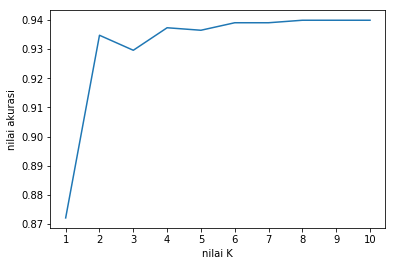

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(array_hasil)
plt.ylabel('nilai akurasi')
plt.xlabel('nilai K')
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()

# KNN dengan data Normalisasi

In [13]:
array_norm=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_scaled_train,y_train)

    #masukan prediksi
    pred1=knn.predict(x_scaled_test)

    #nilaiPrediksi
    hasil1=accuracy_score(y_test, pred1)
    array_norm.append(hasil1)
    

In [14]:
print(array_norm)

[0.87467811158798281, 0.93390557939914165, 0.92875536480686693, 0.93819742489270386, 0.93733905579399146, 0.93905579399141625, 0.93819742489270386, 0.93905579399141625, 0.93905579399141625, 0.93991416309012876]


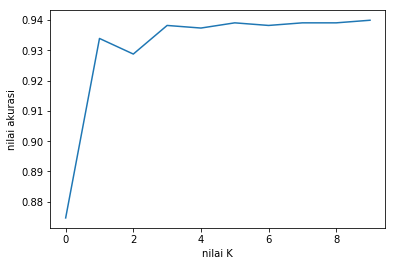

In [15]:
import matplotlib.pyplot as plt
plt.plot(array_norm)
plt.ylabel('nilai akurasi')
plt.xlabel('nilai K')

plt.show()